**Data cleaning using Tableua Prep**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier



In [2]:
# Read CSV cleaned train data file into DataFrame
train_df = pd.read_csv("../input/ml-cleaned-v2/train_clean_v2_agegroup_withdutation.csv")

test_df = pd.read_csv("../input/ml-cleaned-v2/test_clean_v2_agegroup_withdutation.csv")

# preview train data
train_df.head(7)

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,admin,married,university.degree,0,0,0,telephone,jun,61,4,0,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
1,4,management,married,underhigh,0,1,0,telephone,may,637,3,0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
2,3,admin,married,high.school,0,1,0,cellular,may,141,1,0,1,failure,-1.8,92.893,-46.2,1.250,5099.1,0
3,4,technician,married,professional.course,0,1,0,cellular,aug,1144,3,0,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
4,3,technician,single,professional.course,0,1,0,telephone,may,138,8,0,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
5,3,admin,married,university.degree,0,0,0,telephone,jun,102,1,0,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
6,3,blue-collar,married,underhigh,0,0,0,cellular,may,15,6,0,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0


In [3]:
train_df.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,28832.000000,28832.000000,28832.000000,28832.000000,28832.000000,28832.000000,28832.000000,28832.000000,28832.000000,28832.000000,28832.000000,28832.000000,28832.000000,28832.000000
mean,2.457547,0.000104,0.546823,0.152608,258.372295,2.552962,0.037285,0.137451,0.082003,93.576363,-40.513100,3.622953,5167.058404,0.113624
std,1.127384,0.010200,0.497811,0.359616,258.720278,2.741022,0.189462,0.344329,1.568585,0.577625,4.621545,1.731999,72.034959,0.317359
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,102.000000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,2.000000,0.000000,1.000000,0.000000,180.000000,2.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,3.000000,0.000000,1.000000,0.000000,320.000000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,1.000000,1.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [4]:
train_data = train_df.copy()
test_data = test_df.copy()

In [5]:
train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,admin,married,university.degree,0,0,0,telephone,jun,61,4,0,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
1,4,management,married,underhigh,0,1,0,telephone,may,637,3,0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
2,3,admin,married,high.school,0,1,0,cellular,may,141,1,0,1,failure,-1.8,92.893,-46.2,1.250,5099.1,0
3,4,technician,married,professional.course,0,1,0,cellular,aug,1144,3,0,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
4,3,technician,single,professional.course,0,1,0,telephone,may,138,8,0,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0


In [6]:
test_data.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2,services,married,high.school,0,1,0,telephone,may,226,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,4,services,married,high.school,0,0,1,telephone,may,307,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,1,technician,single,professional.course,0,1,0,telephone,may,380,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,4,retired,married,underhigh,0,1,1,telephone,may,174,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,1,unemployed,married,high.school,0,0,0,telephone,may,38,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [7]:
train_dummies = pd.get_dummies(train_data, columns=['age','job','marital','education','contact','month','poutcome'])
test_dummies = pd.get_dummies(test_data, columns=['age','job','marital','education','contact','month','poutcome'])

Random under-sampling:
1    3276
0    3276
Name: y, dtype: int64


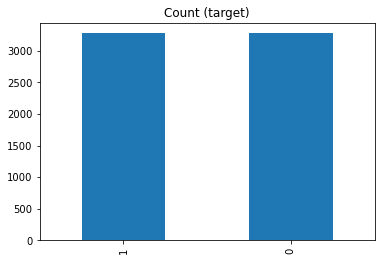

In [8]:
## Resampling Data (Simple method) ##

# Class count
count_class_0, count_class_1 = train_dummies.y.value_counts()

# Divide by class
df_class_0 = train_dummies[train_dummies['y'] == 0]
df_class_1 = train_dummies[train_dummies['y'] == 1]


# Under sampling
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_train_under.y.value_counts())

df_train_under.y.value_counts().plot(kind='bar', title='Count (target)')

Random over-sampling:
1    25556
0    25556
Name: y, dtype: int64


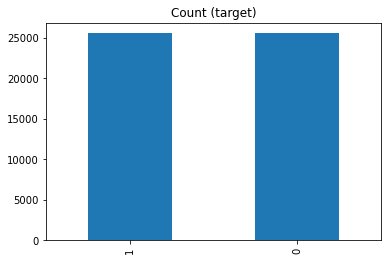

In [9]:
# Over sampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over.y.value_counts())

df_train_over.y.value_counts().plot(kind='bar', title='Count (target)')

In [10]:
# Under sampling
X_under = df_train_under.loc[:, df_train_under.columns != 'y']  
y_under = df_train_under['y']

# Over sampling
X_over = df_train_over.loc[:, df_train_over.columns != 'y']  
y_over = df_train_over['y']

In [11]:
test_size= 0.20
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X_under, y_under, test_size=test_size, random_state=seed)

models = [RandomForestClassifier(n_estimators=100),LogisticRegression(max_iter=1000),KNeighborsClassifier(),DecisionTreeClassifier()]

kfold = KFold(n_splits=10, random_state=seed)    
# train the model
#cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

for model in models:
    scores_accuracy = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    scores_log_loss = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_log_loss')
    scores_auc = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='roc_auc')
    print('Model:', model)
    print('K-fold cross-validation results:')
    print(model.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
    print(model.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
    print(model.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Model: RandomForestClassifier()
K-fold cross-validation results:
RandomForestClassifier average accuracy is 0.879
RandomForestClassifier average log_loss is 0.321
RandomForestClassifier average auc is 0.932


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model: LogisticRegression(max_iter=1000)
K-fold cross-validation results:
LogisticRegression average accuracy is 0.868
LogisticRegression average log_loss is 0.341
LogisticRegression average auc is 0.931
Model: KNeighborsClassifier()
K-fold cross-validation results:
KNeighborsClassifier average accuracy is 0.854
KNeighborsClassifier average log_loss is 1.531
KNeighborsClassifier average auc is 0.907
Model: DecisionTreeClassifier()
K-fold cross-validation results:
DecisionTreeClassifier average accuracy is 0.827
DecisionTreeClassifier average log_loss is 5.970
DecisionTreeClassifier average auc is 0.829


In [12]:
test_size= 0.30
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X_under, y_under, test_size=test_size, random_state=seed)

models = [RandomForestClassifier(n_estimators=100),LogisticRegression(max_iter=1000),KNeighborsClassifier(),DecisionTreeClassifier()]

kfold = KFold(n_splits=10, random_state=seed)    
# train the model
#cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

for model in models:
    scores_accuracy = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    scores_log_loss = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_log_loss')
    scores_auc = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='roc_auc')
    print('Model:', model)
    print('K-fold cross-validation results:')
    print(model.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
    print(model.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
    print(model.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Model: RandomForestClassifier()
K-fold cross-validation results:
RandomForestClassifier average accuracy is 0.875
RandomForestClassifier average log_loss is 0.340
RandomForestClassifier average auc is 0.930
Model: LogisticRegression(max_iter=1000)
K-fold cross-validation results:
LogisticRegression average accuracy is 0.867
LogisticRegression average log_loss is 0.342
LogisticRegression average auc is 0.931
Model: KNeighborsClassifier()
K-fold cross-validation results:
KNeighborsClassifier average accuracy is 0.849
KNeighborsClassifier average log_loss is 1.517
KNeighborsClassifier average auc is 0.906
Model: DecisionTreeClassifier()
K-fold cross-validation results:
DecisionTreeClassifier average accuracy is 0.829
DecisionTreeClassifier average log_loss is 5.852
DecisionTreeClassifier average auc is 0.827


In [13]:
for model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print('Model:', model, 'AUC Score:', roc_auc_score(Y_test, predictions))
    print(classification_report(Y_test, predictions))

Model: RandomForestClassifier() AUC Score: 0.8841595184473736
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       974
           1       0.86      0.93      0.89       992

    accuracy                           0.88      1966
   macro avg       0.89      0.88      0.88      1966
weighted avg       0.89      0.88      0.88      1966

Model: LogisticRegression(max_iter=1000) AUC Score: 0.8732198450023184
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       974
           1       0.87      0.89      0.88       992

    accuracy                           0.87      1966
   macro avg       0.87      0.87      0.87      1966
weighted avg       0.87      0.87      0.87      1966

Model: KNeighborsClassifier() AUC Score: 0.8629435897860501
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       974
           1       0.85      0.89      0.87 

In [14]:
final_model = RandomForestClassifier(n_estimators=100)

final_model.fit(X_under, y_under)

test_dummies['y'] = final_model.predict_proba(test_dummies)[:,1]
test_dummies['Id'] = range(1,test_dummies.shape[0]+1)


submission = test_dummies[['Id','y']] 
submission

submission.to_csv("Rf_undersampling.csv", index=False) 
submission.tail()


#Please note that we use random undersampling, therefore the private score might differ a bit

,Id,y
12351,12352,0.95
12352,12353,0.90
12353,12354,0.96
12354,12355,0.70
12355,12356,0.88
